In [2]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.24.3

    Uninstalling numpy-1.24.3:

      Successfully uninstalled numpy-1.24.3

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.3.2 which is incompatible.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.6 which is incompatible.


In [2]:
!pip show imbalanced-learn


Name: imbalanced-learn
Version: 0.14.0
Summary: Toolbox for imbalanced dataset in machine learning
Home-page: https://imbalanced-learn.org/
Author: 
Author-email: "G. Lemaitre" <g.lemaitre58@gmail.com>, "C. Aridas" <ichkoar@gmail.com>
License: 
Location: c:\users\vanya\appdata\roaming\python\python310\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


In [3]:
import sys
!{sys.executable} -m pip install imbalanced-learn


  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
python3.10 -m pip install xgboost

SyntaxError: invalid syntax. Perhaps you forgot a comma? (767794791.py, line 1)

In [2]:
## Importing all the necessary librarires

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , RandomizedSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_auc_score , roc_curve , auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
# Step 1: Load the dataset
df = pd.read_csv("C:/Users/vanya/OneDrive/Desktop/VANYA/Clg_Project/diabetes_prediction_dataset.csv")

In [4]:
# Step 2: Explore the data
print("First 5 rows:\n", df.head())

First 5 rows:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [5]:
print("\nDataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [6]:
df["age"] = df["age"].astype(int)

In [7]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [8]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80,0,0,No Info,27.32,6.2,90,0
99996,Female,2,0,0,No Info,17.37,6.5,100,0
99997,Male,66,0,0,former,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


In [9]:
df.shape

(100000, 9)

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: xlabel='diabetes'>

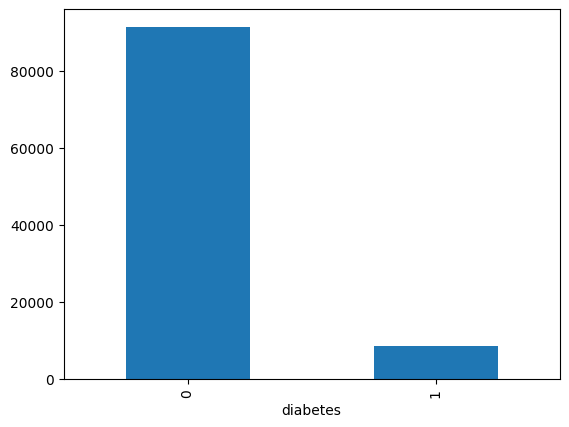

In [12]:
df['diabetes'].value_counts().plot(kind='bar')

In [13]:
# Huge Class Imbalanced detected

Exploratory Data Analysis 

In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Mean age: 41.87566
Median age: 43.0


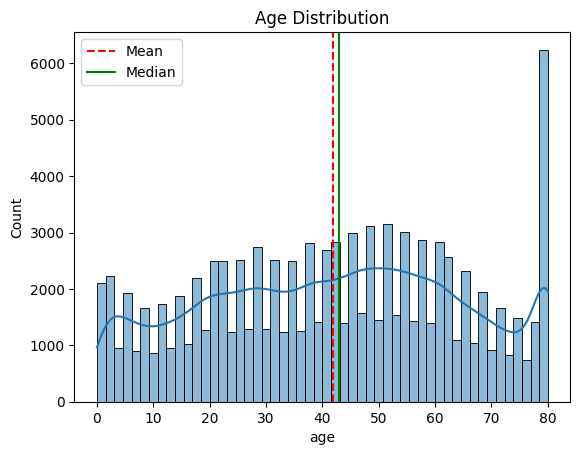

In [15]:
# Histogram for "age"

sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")

mean_age = df["age"].mean()
median_age = df["age"].median()

print("Mean age:", mean_age)
print("Median age:", median_age)

plt.axvline(mean_age, color="red", linestyle="--", label="Mean")
plt.axvline(median_age, color="green", linestyle="-", label="Median")

plt.legend()
plt.show()

In [16]:
# Count patients with age = 80
count_80 = df[df['age'] == 80].shape[0]
print("Number of patients with age 80:", count_80)

# Also check percentage
percentage_80 = (count_80 / df.shape[0]) * 100
print(f"Percentage of patients with age 80: {percentage_80:.2f}%")

Number of patients with age 80: 5621
Percentage of patients with age 80: 5.62%


Mean BMI: 27.3207671
Median BMI: 27.32


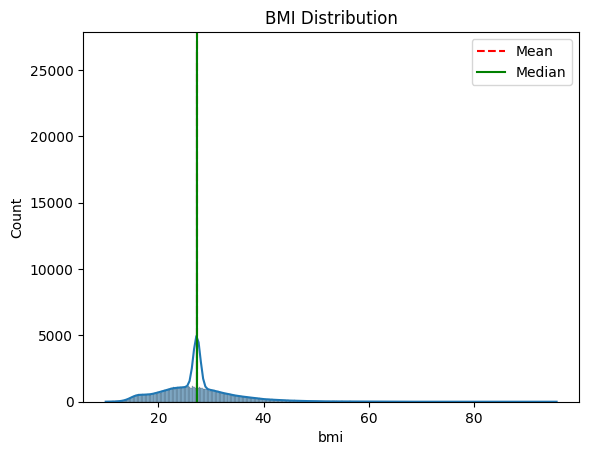

In [17]:
# Histogram for "bmi"

sns.histplot(df["bmi"], kde=True)
plt.title("BMI Distribution")

mean_bmi = df["bmi"].mean()
median_bmi = df["bmi"].median()

print("Mean BMI:", mean_bmi)
print("Median BMI:", median_bmi)

plt.axvline(mean_bmi, color="red", linestyle="--", label="Mean")
plt.axvline(median_bmi, color="green", linestyle="-", label="Median")

plt.legend()
plt.show()

Mean HbA1c_level: 5.527507
Median HbA1c_level: 5.8


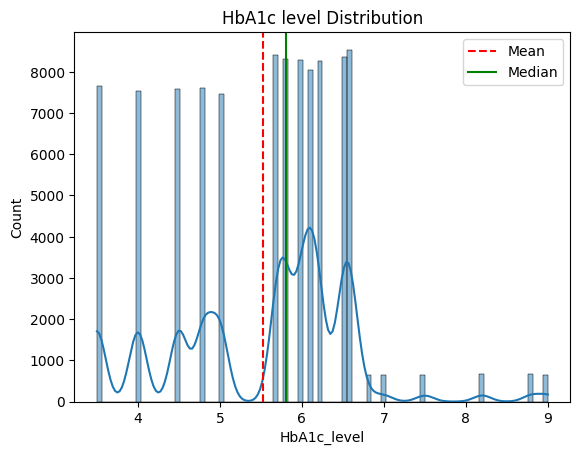

In [18]:
# Histogram for "HbA1c_level"

sns.histplot(df["HbA1c_level"], kde=True)
plt.title("HbA1c level Distribution")

mean_hba1c = df["HbA1c_level"].mean()
median_hba1c = df["HbA1c_level"].median()

print("Mean HbA1c_level:", mean_hba1c)
print("Median HbA1c_level:", median_hba1c)

plt.axvline(mean_hba1c, color="red", linestyle="--", label="Mean")
plt.axvline(median_hba1c, color="green", linestyle="-", label="Median")

plt.legend()
plt.show()

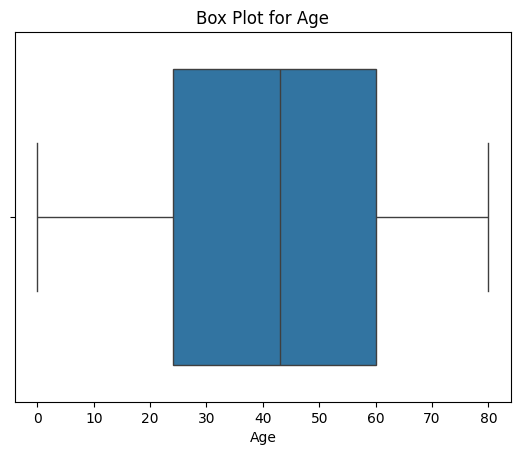

In [19]:
# Boxplots for identifying outliers
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

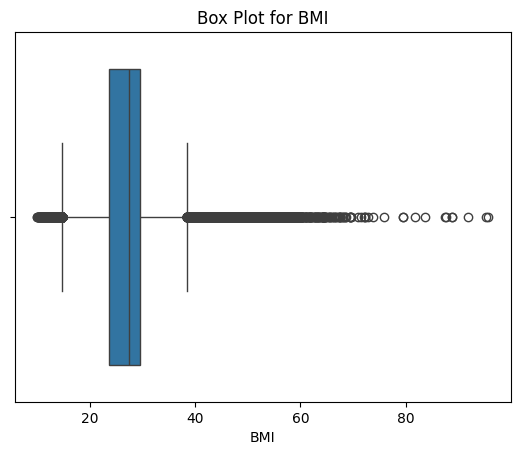

In [20]:
sns.boxplot(x=df["bmi"])
plt.title("Box Plot for BMI")
plt.xlabel("BMI")
plt.show()

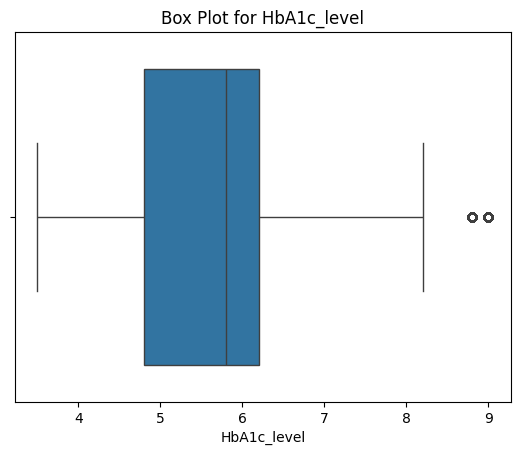

In [21]:
sns.boxplot(x=df["HbA1c_level"])
plt.title("Box Plot for HbA1c_level")
plt.xlabel("HbA1c_level")
plt.show()

In [22]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]


In [23]:
len(age_outliers)

0

In [24]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bmi_outliers = df[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]

In [25]:
len(bmi_outliers)

7086

In [26]:
Q1 = df["HbA1c_level"].quantile(0.25)
Q3 = df["HbA1c_level"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hba1c_outliers = df[(df["HbA1c_level"] < lower_bound) | (df["HbA1c_level"] > upper_bound)]

In [27]:
len(hba1c_outliers)

1315

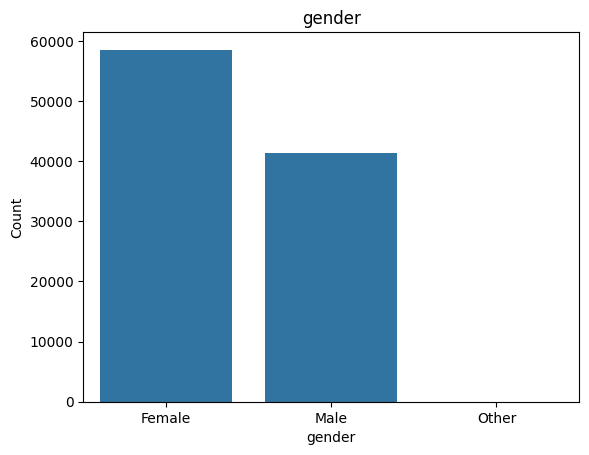

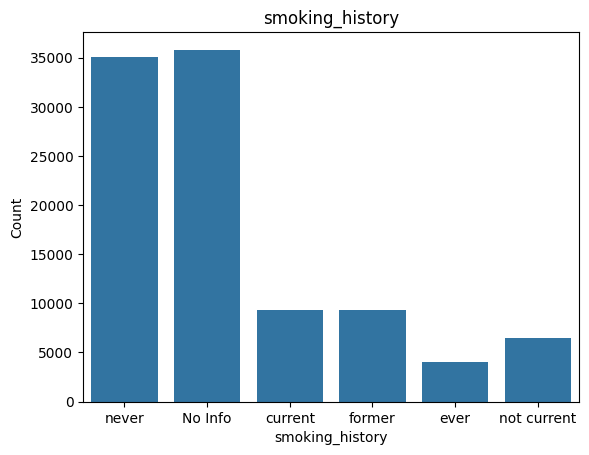

In [28]:
categorical_columns = ['gender' , 'smoking_history']
for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# Step 3: Encode categorical columns
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,0,27.32,6.2,90,0
99996,0,2,0,0,0,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,0,24,0,0,4,35.42,4.0,100,0


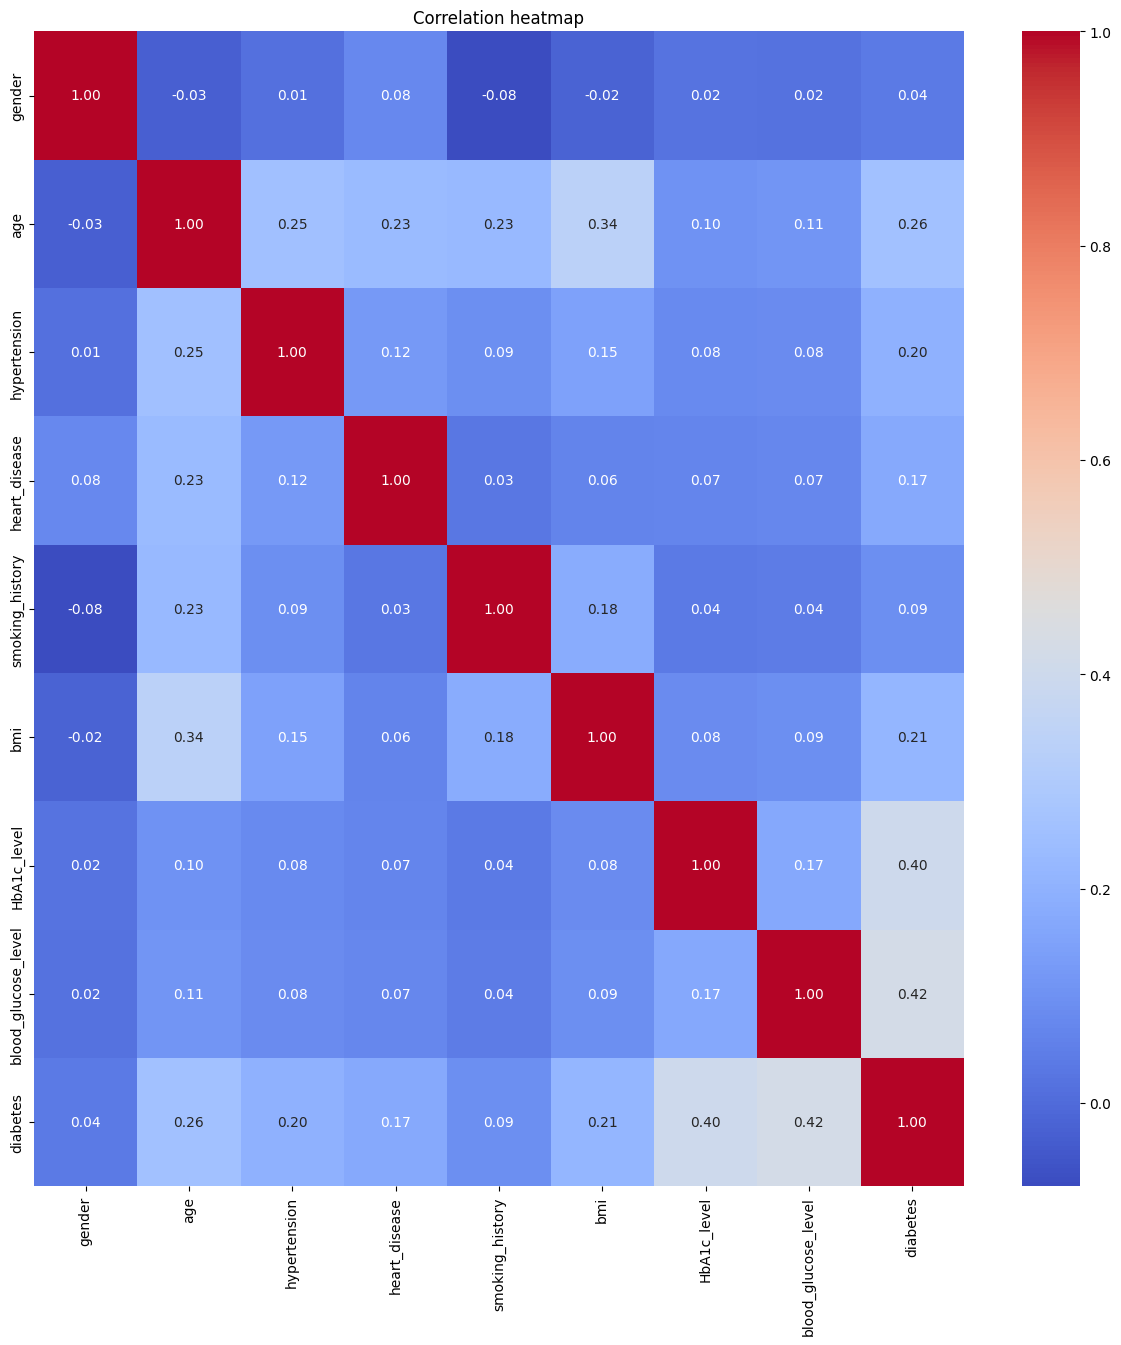

In [31]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [32]:
# Step 4: Features and Target
X = np.asarray(df.drop(['diabetes'] , axis=1))
y = np.asarray(df['diabetes'])
X_norm = StandardScaler().fit(X).transform(X)

In [33]:
# Step 5: Train-test split
X_train , X_test , y_train , y_test = train_test_split(X_norm , y , test_size=0.2 , random_state=42 , stratify=y)

In [34]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [35]:
# 5. Define Models
log_reg = LogisticRegression(max_iter=500) 
dt = DecisionTreeClassifier(random_state=42) 
rf = RandomForestClassifier(random_state=42) 
knn = KNeighborsClassifier(n_neighbors=5) 
svm = LinearSVC( random_state=42 , max_iter=10000) 
xgb = XGBClassifier(eval_metric="logloss")

In [36]:
models = { "Logistic Regression": log_reg, "Decision Tree": dt, "Random Forest": rf, "KNN": knn, "SVM": svm, "XGBoost": xgb }


Logistic Regression Accuracy: 0.8878
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.42      0.89      0.57      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.75     20000
weighted avg       0.94      0.89      0.90     20000


Decision Tree Accuracy: 0.9479
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.67      0.75      0.71      1700

    accuracy                           0.95     20000
   macro avg       0.83      0.86      0.84     20000
weighted avg       0.95      0.95      0.95     20000


Random Forest Accuracy: 0.9597
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.77      0.74      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.88   

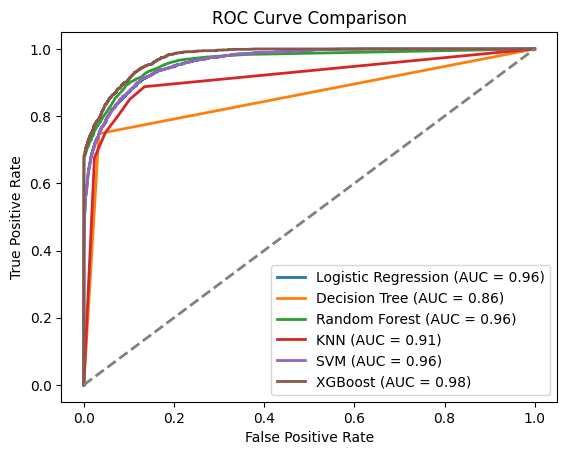

In [38]:
# 6. Train & Evaluate Models
results = {} 
for name, model in models.items(): 
    model.fit(X_train_smote, y_train_smote) 
    y_pred = model.predict(X_test) 
    acc = accuracy_score(y_test, y_pred) 
    results[name] = acc 
    print(f"\n{name} Accuracy: {acc:.4f}") 
    print(classification_report(y_test, y_pred))
    '''y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f'ROC-AUC score: {roc_auc:.4f}')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()'''
    if hasattr(model, "predict_proba"):  
        y_score = model.predict_proba(X_test)[:, 1]  # probability for positive class
    else:  
        # Some models like SVM (without probability=True) don’t support predict_proba
        y_score = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


In [39]:
# 7. Stacking Ensemble
estimators = [ ('lr', log_reg), ('dt', dt), ('rf', rf), ('knn', knn), ('svm', svm), ('xgb', xgb) ]

In [40]:
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()) 
stack.fit(X_train_smote, y_train_smote)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=500)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('svm',
                                LinearSVC(max_iter=10000, random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression())

In [41]:
y_pred_stack = stack.predict(X_test) 
print("\nStacking Model Accuracy:", accuracy_score(y_test, y_pred_stack)) 
print(classification_report(y_test, y_pred_stack))


Stacking Model Accuracy: 0.962
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.80      0.74      0.77      1700

    accuracy                           0.96     20000
   macro avg       0.89      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000



In [43]:
!pip install deap

Defaulting to user installation because normal site-packages is not writeable


In [42]:
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif 
from deap import base, creator, tools, algorithms

In [43]:
# 8. Feature Selection
# (a) Recursive Feature Elimination (RFE) 
feature_columns = [col for col in df.columns if col != 'diabetes']
rfe_selector = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=5) 
rfe_selector.fit(X_train_smote, y_train_smote) 
selected_rfe = np.array(feature_columns)[rfe_selector.support_] 
print("\nRFE Selected Features:", list(selected_rfe))


RFE Selected Features: ['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [44]:
# Use ANOVA F-value 
fvalue_selector = SelectKBest(score_func=f_classif, k=5)
fvalue_selector.fit(X_train_smote, y_train_smote)
selected_fvalue = np.array(feature_columns)[fvalue_selector.get_support()]
print("ANOVA F-value Selected Features:", list(selected_fvalue))

ANOVA F-value Selected Features: ['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [45]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data to make it non-negative
scaler = MinMaxScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

# Now use Chi-Square on the scaled data
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_train_smote_scaled, y_train_smote)
selected_chi2 = np.array(feature_columns)[chi2_selector.get_support()]
print("Chi2 Selected Features:", list(selected_chi2))

Chi2 Selected Features: ['age', 'hypertension', 'heart_disease', 'HbA1c_level', 'blood_glucose_level']


In [46]:
# 9. Train Stacking on Selected Features
X_train_sel = chi2_selector.transform(X_train_smote) # example: Chi2 
X_test_sel = chi2_selector.transform(X_test) 
stack.fit(X_train_sel, y_train_smote) 
y_pred_sel = stack.predict(X_test_sel) 
print("\nStacking (Chi2 Features) Accuracy:", accuracy_score(y_test, y_pred_sel))


Stacking (Chi2 Features) Accuracy: 0.96455


In [55]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/544.3 kB ? eta -:--:--
   ---------------------------------------- 544.3/544.3 kB 2.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 4.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 4.2 MB/s  0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   - -------------------------------------- 0.8/30.3 MB 4.8 MB/s eta 0:00:07
   -- ------------------------------------- 1.6/30.3 MB 4.2 MB/s eta 0:00:07
   --- ------------------------------------ 2.4/30.3 MB 4.1 MB/s eta 0:00:07
   ---- ----------------------------------- 3.1/30.3 MB 4.0 MB/s eta 0:00:07
   ----- -----------------

In [48]:
import shap

C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
# 10. XAI with SHAP
explainer = shap.Explainer(xgb, X_train_smote) 
shap_values = explainer(X_test)

100%|===================| 19919/20000 [00:53<00:00]        

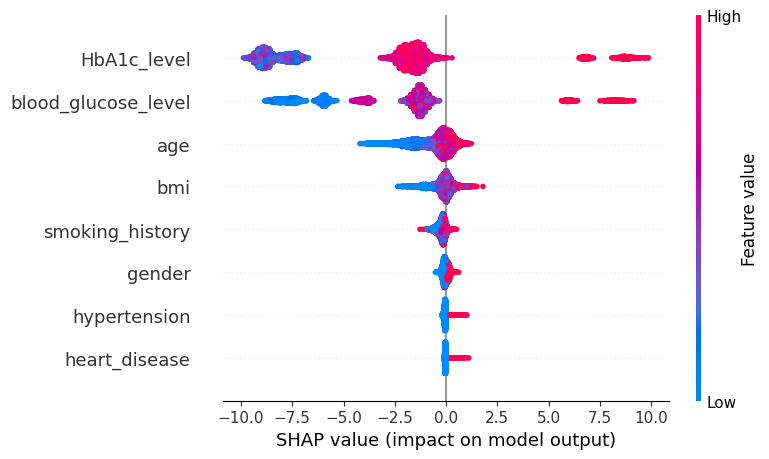

In [50]:
shap.summary_plot(shap_values, X_test, feature_columns)

In [51]:
from sklearn.calibration import CalibratedClassifierCV

In [52]:
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga']
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge'],
        'dual': [True, False]  # For LinearSVC
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'eval_metric': ['logloss']  # Added eval_metric parameter
    }
}

In [53]:
# Tune each model with no parallel processing
best_models = {}
for name, model in models.items():
    print(f"\nTuning {name}...")
    
    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=3,  # Reduce iterations to save time
        scoring='roc_auc',
        cv=2,       # Reduce cross-validation folds
        random_state=42,
        n_jobs=1    # No parallel processing
    )
    
    rs.fit(X_train_smote, y_train_smote)
    print(f"Best Params for {name}: {rs.best_params_}")
    best_models[name] = rs.best_estimator_


Tuning Logistic Regression...
Best Params for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}

Tuning Decision Tree...
Best Params for Decision Tree: {'min_samples_split': 5, 'max_depth': None}

Tuning Random Forest...
Best Params for Random Forest: {'n_estimators': 100, 'max_depth': None}

Tuning KNN...
Best Params for KNN: {'n_neighbors': 11}

Tuning SVM...


C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\mode

Best Params for SVM: {'loss': 'squared_hinge', 'dual': True, 'C': 10}

Tuning XGBoost...
Best Params for XGBoost: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'eval_metric': 'logloss'}


In [54]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Handle probability estimation differently for LinearSVC
    if name == "SVM":
        # Use decision function for LinearSVC
        decision_scores = model.decision_function(X_test)
        # Scale decision scores to approximate probabilities
        y_proba = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
    else:
        # Use predict_proba for other models
        y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8878
Logistic Regression ROC-AUC: 0.9625
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.42      0.89      0.57      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.75     20000
weighted avg       0.94      0.89      0.90     20000


Decision Tree Accuracy: 0.9526
Decision Tree ROC-AUC: 0.8719
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.71      0.74      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000


Random Forest Accuracy: 0.9597
Random Forest ROC-AUC: 0.9647
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.77      0.74      

In [55]:
# Create a calibrated version of SVM for probability estimates
calibrated_svm = CalibratedClassifierCV(best_models["SVM"], method='sigmoid', cv=3)
calibrated_svm.fit(X_train_smote, y_train_smote)

C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(cv=3,
                       estimator=LinearSVC(C=10, dual=True, max_iter=10000,
                                           random_state=42))

In [56]:
estimators = [
    ('lr', best_models["Logistic Regression"]),
    ('dt', best_models["Decision Tree"]),
    ('rf', best_models["Random Forest"]),
    ('knn', best_models["KNN"]),
    ('svm', calibrated_svm),  # Use calibrated version
    ('xgb', best_models["XGBoost"])
]


In [57]:
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=500)
)

stack.fit(X_train_smote, y_train_smote)

C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vanya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vanya\AppData\Roaming\Python\Python3

StackingClassifier(estimators=[('lr', LogisticRegression(C=0.01, max_iter=500)),
                               ('dt',
                                DecisionTreeClassifier(min_samples_split=5,
                                                       random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=11)),
                               ('svm',
                                CalibratedClassifierCV(cv=3,
                                                       estimator=LinearSVC(C=10,
                                                                           dual=True,
                                                                           max_iter=10000,
                                                                           random_state=42))),
                               ('xgb',
                                XG...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(max_iter=500))

In [58]:
y_pred_stack = stack.predict(X_test)
y_proba_stack = stack.predict_proba(X_test)[:,1]

print("\nStacking Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking ROC-AUC:", roc_auc_score(y_test, y_proba_stack))


Stacking Accuracy: 0.96205
Stacking ROC-AUC: 0.960189087110254


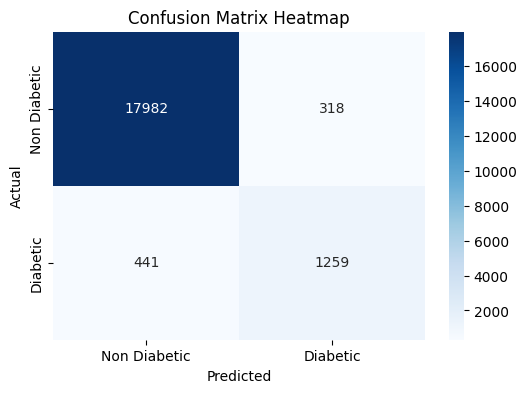

In [60]:
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non Diabetic", "Diabetic"], yticklabels=["Non Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

 99%|===================| 19896/20000 [00:23<00:00]        

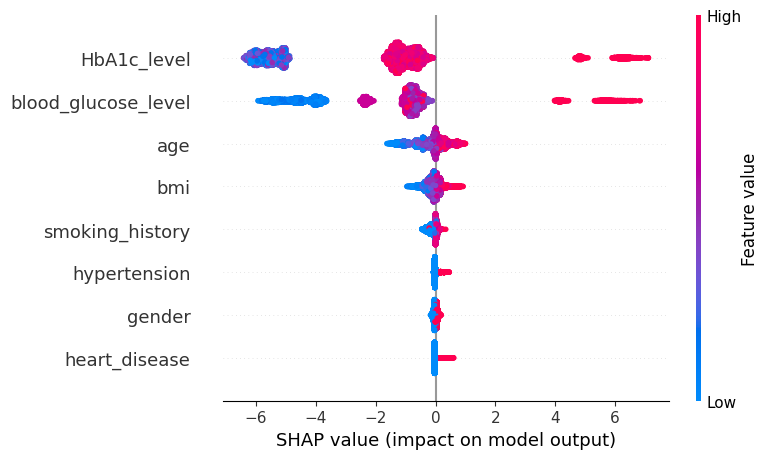

In [59]:
explainer = shap.Explainer(best_models["XGBoost"], X_train_smote)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_columns)